In [22]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# load the data

data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
#  get dummies

data_one_hot  = pd.get_dummies(data, dtype=int)

data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [25]:
len(data_one_hot)

1338

In [26]:
# Build X and y values
features = list(data_one_hot.columns)
features.remove("charges")
features

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [27]:
X = data_one_hot[features]
y = data_one_hot["charges"]

len(X), len(y)

(1338, 1338)

In [28]:
# create training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [29]:
len(X_train), len(y_train),  len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [30]:
# bUild a neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

insurance_model.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])

history = insurance_model.fit(X_train, y_train, epochs=200)



Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 13279.6289 - mae: 13279.6289 
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 13132.2900 - mae: 13132.2900
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 12834.9482 - mae: 12834.9482
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12230.9736 - mae: 12230.9736
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 11173.3613 - mae: 11173.3613
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 9742.2549 - mae: 9742.2549
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 8326.2207 - mae: 8326.2207
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 7538.6084 - mae: 7538.6084
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 7407.1519 - mae: 7407.1519
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 7379.1172 - mae: 7379.1172
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 7357.5679 - mae: 7357.5679
Epoch 12/200
34/34 ━━

In [32]:
# evaluate the model

insurance_model.evaluate(X_test, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3470.9097 - mae: 3470.9097


[3405.2939453125, 3405.2939453125]

Text(0.5, 0, 'Epoch')

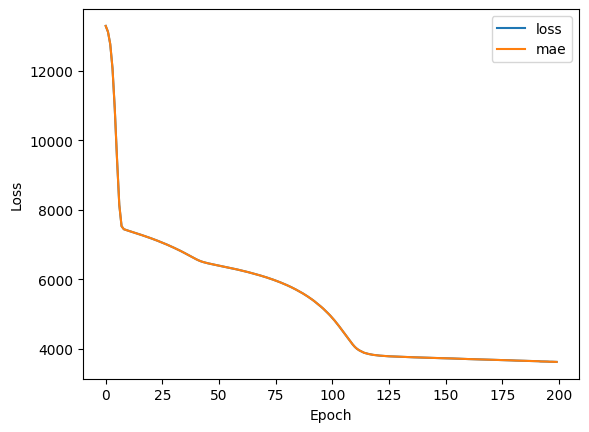

In [39]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epoch")

<Axes: ylabel='Frequency'>

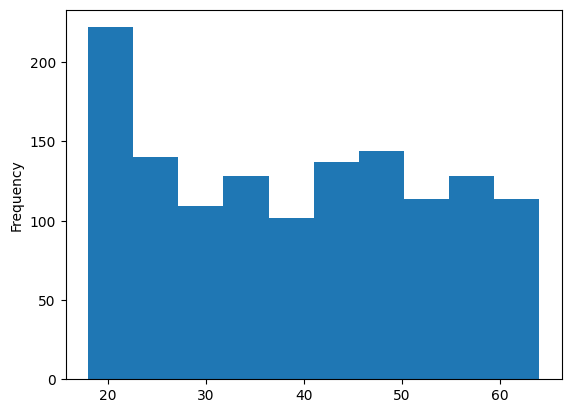

In [43]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

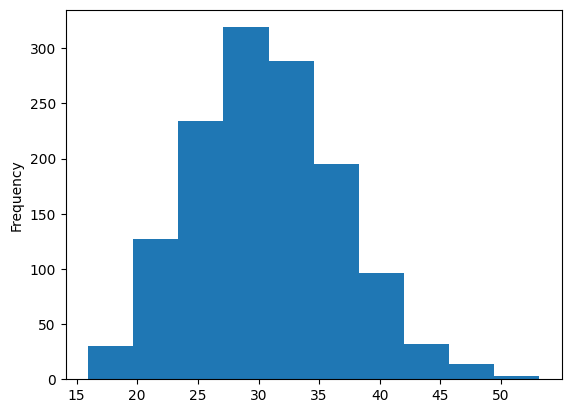

In [46]:
X["bmi"].plot(kind="hist")

In [51]:
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [54]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
X = data.drop("charges", axis=1)

y = data["charges"]

In [58]:
len(X), len(y)

(1338, 1338)

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"] )    
)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

len(X_train), len(X_test) , len(y_train), len(y_test)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [67]:
X_train_normal.shape

(1070, 11)

In [68]:
X.shape

(1338, 6)

In [81]:
import tensorflow as tf

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

loss_fn = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam()

insurance_model_2.compile(loss=loss_fn, optimizer=optimizer, metrics=["mae"])

insurance_model_2.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 13533.0225 - mae: 13533.0225
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 13525.6631 - mae: 13525.6631
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 13507.0684 - mae: 13507.0684
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 13466.0928 - mae: 13466.0928
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 13391.0684 - mae: 13391.0684
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 13270.9121 - mae: 13270.9121
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13095.2188 - mae: 13095.2188
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 12854.0127 - mae: 12854.0127
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 12537.6094 - mae: 12537.6094
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 12139.2451 - mae: 12139.2451
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 11669.3438 - mae: 11669.3438
Epoch 12/5

In [82]:
insurance_model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)